### DOS Method

Done By:
1. Gurudatta Tej Marupudi
2. Mohammad Sohail Sayed

Import the required Libraries

In [23]:
# importing the required libraries
from osgeo import gdal
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import elevation
from matplotlib.pyplot import figure
import os
import geopandas as gpd
from rasterio.crs import CRS
import rioxarray as rxr
import earthpy as et
import fiona
import rasterio
import rasterio.mask
import xarray as xr
import earthpy.spatial as es
import earthpy.plot as ep

Install the libraries

In [39]:
!pip install elevation
!pip install richdem
!pip install pysheds
!pip install plantcv
!apt install imagemagick
!pip install fiona
!pip install rasterio
!pip install shapely
!pip install pyproj
!pip install geopandas
!pip install rioxarray
!pip install earthpy

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
imagemagick is already the newest version (8:6.9.11.60+dfsg-1.3ubuntu0.22.04.3).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


Print the information about different parameters of the image taken

In [34]:
from tabulate import tabulate

landsat_mlt_dict = {}
landsat_metadata_path = '/content/drive/MyDrive/major_Project/Datasets/LE07_L1TP_135042_20211122_20220102_01_T1/LE07_L1TP_135042_20211122_20220102_01_T1_MTL.txt'

with open(landsat_metadata_path, 'r') as _:
    for line in _:
        line = line.strip()
        if line != 'END':
            key, value = line.split('=')
            landsat_mlt_dict[key] = value

mlt_table = tabulate(landsat_mlt_dict.items(), headers=['Parameter', 'Value'], tablefmt='grid')
print(mlt_table)

+--------------------------------+----------------------------------------------------------+
| Parameter                      | Value                                                    |
+================================+==========================================================+
| GROUP                          | PROJECTION_PARAMETERS                                    |
+--------------------------------+----------------------------------------------------------+
| ORIGIN                         | "Image courtesy of the U.S. Geological Survey"           |
+--------------------------------+----------------------------------------------------------+
| REQUEST_ID                     | "P50175cspp206_03570"                                    |
+--------------------------------+----------------------------------------------------------+
| LANDSAT_SCENE_ID               | "LE71350422021326EDC00"                                  |
+--------------------------------+--------------------------

### **Detect Atmospheric Error**
Check for the Cloud cover percentage

In [35]:
metadata_1='/content/drive/MyDrive/major_Project/Datasets/LE07_L1TP_135042_20211122_20220102_01_T1/LE07_L1TP_135042_20211122_20220102_01_T1_MTL.txt'
metadata_2= '/content/drive/MyDrive/major_Project/Datasets/Lansat7_2/LE07_L1TP_018034_20231028_20231123_02_T1_MTL.txt'

#check for the cloud cover
def check_cloud_cover(metadata_path):
    with open(metadata_path, 'r') as file:
        for line in file:
            line = line.strip()
            if 'CLOUD_COVER' in line:
                key, value = map(str.strip, line.split('='))
                cloud_cover = float(value)
                return cloud_cover
    return None

def assess_atmospheric_errors(metadata_path,cloud_cover_threshold):
    # Check cloud cover percentage
    cloud_cover = check_cloud_cover(metadata_path)

    if cloud_cover is not None:
        print(f"Cloud Cover Percentage: {cloud_cover}%")

        # Assess atmospheric errors based on the cloud cover threshold
        if cloud_cover > cloud_cover_threshold:
            print("High cloud cover may indicate atmospheric interference.")
        else:
            print("Low cloud cover suggests lower likelihood of atmospheric interference.")
    else:
        print("Cloud cover information not found in metadata.")

# Set your desired cloud cover threshold (percentage)
cloud_cover_threshold = 10.0

# Call the function to assess atmospheric errors
print('for Example1')
assess_atmospheric_errors(metadata_1,cloud_cover_threshold)
print('\n For Example2:')
assess_atmospheric_errors(metadata_2,cloud_cover_threshold)



for Example1
Cloud Cover Percentage: 13.0%
High cloud cover may indicate atmospheric interference.

 For Example2:
Cloud Cover Percentage: 60.0%
High cloud cover may indicate atmospheric interference.


print the true color composite image

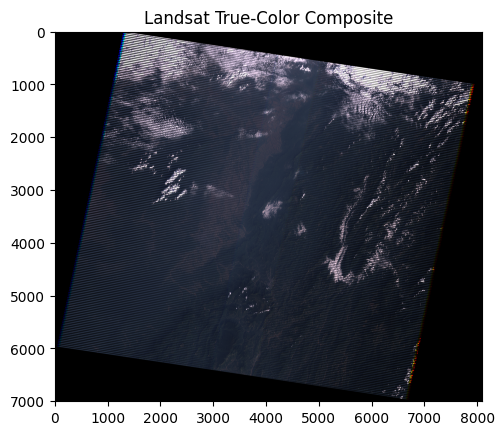

In [27]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np

# Replace the placeholders with the actual paths to your Landsat 7 band files
band_paths = ['/content/drive/MyDrive/major_Project/Datasets/LE07_L1TP_135042_20211122_20220102_01_T1/LE07_L1TP_135042_20211122_20220102_01_T1_B1.TIF',
             '/content/drive/MyDrive/major_Project/Datasets/LE07_L1TP_135042_20211122_20220102_01_T1/LE07_L1TP_135042_20211122_20220102_01_T1_B2.TIF',
             '/content/drive/MyDrive/major_Project/Datasets/LE07_L1TP_135042_20211122_20220102_01_T1/LE07_L1TP_135042_20211122_20220102_01_T1_B3.TIF',
             '/content/drive/MyDrive/major_Project/Datasets/LE07_L1TP_135042_20211122_20220102_01_T1/LE07_L1TP_135042_20211122_20220102_01_T1_B4.TIF',
             '/content/drive/MyDrive/major_Project/Datasets/LE07_L1TP_135042_20211122_20220102_01_T1/LE07_L1TP_135042_20211122_20220102_01_T1_B5.TIF',
             '/content/drive/MyDrive/major_Project/Datasets/LE07_L1TP_135042_20211122_20220102_01_T1/LE07_L1TP_135042_20211122_20220102_01_T1_B7.TIF'
]

qa_band_path= '/content/drive/MyDrive/major_Project/Datasets/LE07_L1TP_135042_20211122_20220102_01_T1/LE07_L1TP_135042_20211122_20220102_01_T1_BQA.TIF'
# Read each band and store in a list
bands = [rasterio.open(band_path).read(1) for band_path in band_paths]

def display_rgb(band_paths):
  bands = [rasterio.open(band_path).read(1) for band_path in band_paths]
  # Stack all bands along the third axis to create a 3D array
  rgb_image = np.stack((bands[2], bands[1], bands[0]), axis=-1)
  plt.imshow(rgb_image)
  plt.title('Landsat True-Color Composite')

display_rgb(band_paths)

Test for Other Image (Example-2)

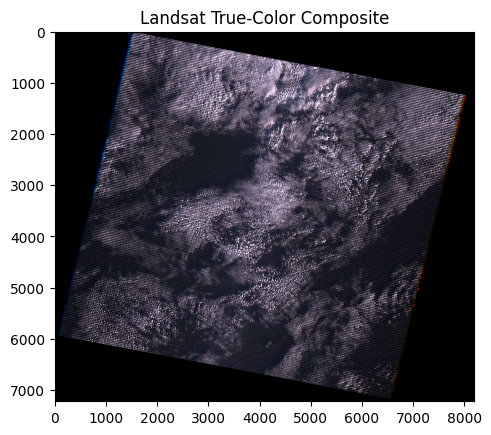

In [28]:
# for Landsat8 Images
band_paths2= ['/content/drive/MyDrive/major_Project/Datasets/Lansat7_2/LE07_L1TP_018034_20231028_20231123_02_T1_B1.TIF',
              '/content/drive/MyDrive/major_Project/Datasets/Lansat7_2/LE07_L1TP_018034_20231028_20231123_02_T1_B2.TIF',
              '/content/drive/MyDrive/major_Project/Datasets/Lansat7_2/LE07_L1TP_018034_20231028_20231123_02_T1_B3.TIF',
              '/content/drive/MyDrive/major_Project/Datasets/Lansat7_2/LE07_L1TP_018034_20231028_20231123_02_T1_B4.TIF',
              '/content/drive/MyDrive/major_Project/Datasets/Lansat7_2/LE07_L1TP_018034_20231028_20231123_02_T1_B5.TIF',
              '/content/drive/MyDrive/major_Project/Datasets/Lansat7_2/LE07_L1TP_018034_20231028_20231123_02_T1_B7.TIF']

qa_band_path2= '/content/drive/MyDrive/major_Project/Datasets/Lansat7_2/LE07_L1TP_018034_20231028_20231123_02_T1_QA_PIXEL.TIF'
# Apply DOS atmospheric correction to all bands

display_rgb(band_paths2)

### **Atmospheric Correction**
Perform DOS method for Atmospheric correction

In [29]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

def dark_object_subtraction(band_paths, qa_band_path, cloud_confidence_threshold=1):
    # Read all bands
    bands = [rasterio.open(band_path).read(1) for band_path in band_paths]

    # Read QA band
    with rasterio.open(qa_band_path) as src_qa:
        qa_band = src_qa.read(1)

    # Create a cloud mask based on QA band
    cloud_mask = np.bitwise_and(qa_band, 0b00000110) > cloud_confidence_threshold

    # Apply the cloud mask to all bands
    masked_bands = [np.ma.masked_where(cloud_mask, band) for band in bands]

    # Estimate dark object values (minimum values in unmasked areas)
    dark_object_values = [np.min(masked_band) for masked_band in masked_bands]

    # Subtract the estimated dark object values from each band
    corrected_bands = [band - dark_object_value for band, dark_object_value in zip(bands, dark_object_values)]

    return corrected_bands

Print the Corrected Image

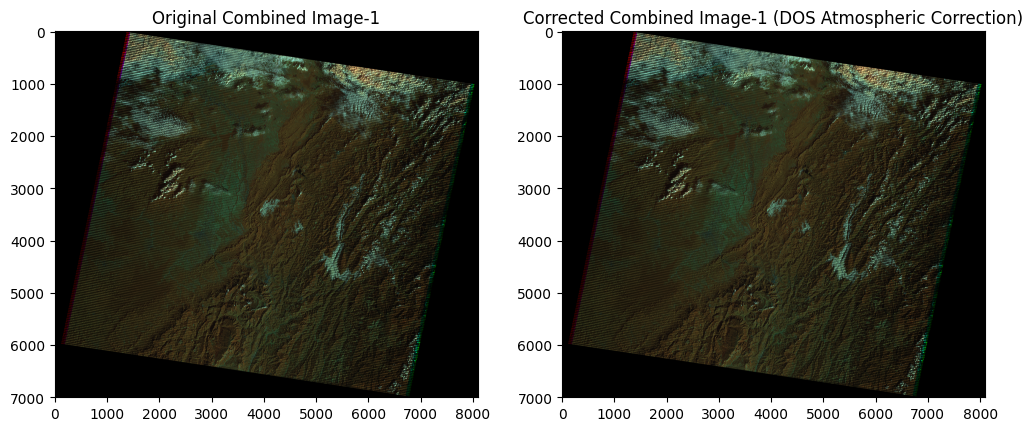

In [30]:
# Apply DOS atmospheric correction to all bands
corrected_bands = dark_object_subtraction(band_paths, qa_band_path)

# Combine the corrected bands into a single RGB image
rgb_image = np.stack(corrected_bands[-3:], axis=-1)  # Assuming bands 4, 3, 2 for RGB

# Plot the original and corrected combined images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.set_title('Original Combined Image-1')
ax1.imshow(np.stack([rasterio.open(band_path).read(1) for band_path in band_paths[-3:]], axis=-1))

ax2.set_title('Corrected Combined Image-1 (DOS Atmospheric Correction)')
ax2.imshow(rgb_image)

plt.show()

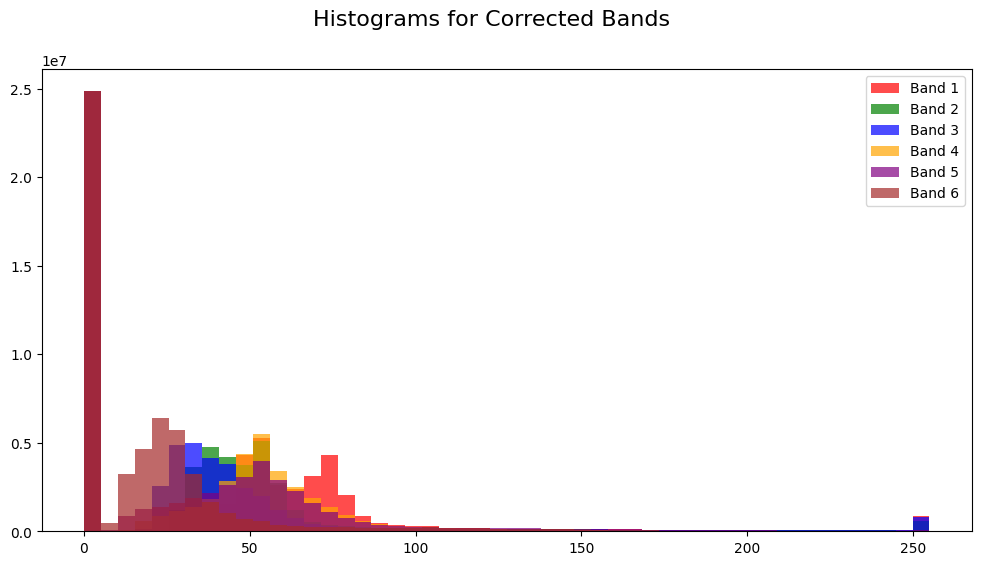

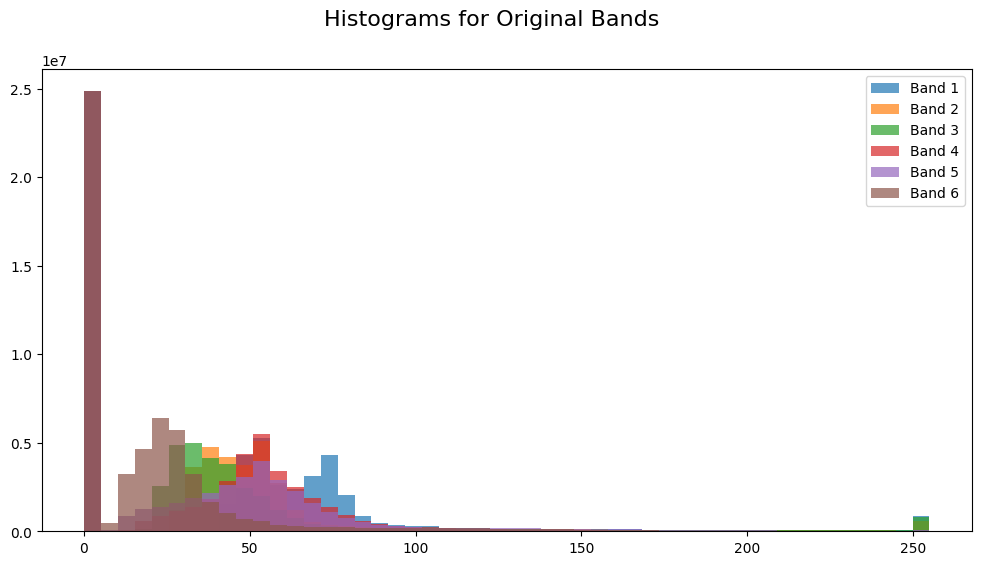

In [52]:
corrected_bands = dark_object_subtraction(band_paths, qa_band_path)
import rasterio
import matplotlib.pyplot as plt

def plot_band_histograms(band_paths, corrected_bands=None):
    # Define distinct colors for each band
    colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'black']

    # Plot histograms for corrected bands in a single plot with distinct colors
    if corrected_bands:
        fig, ax = plt.subplots(figsize=(12, 6))
        fig.suptitle('Histograms for Corrected Bands', fontsize=16)

        for i, (corrected_band, color) in enumerate(zip(corrected_bands, colors)):
            ax.hist(corrected_band.ravel(), bins=50, color=color, alpha=0.7, label=f'Band {i+1}')

        ax.legend()
        plt.show()

    # Plot histograms for original bands in a single plot
    fig, ax = plt.subplots(figsize=(12, 6))
    fig.suptitle('Histograms for Original Bands', fontsize=16)

    for i, band_path in enumerate(band_paths):
        with rasterio.open(band_path) as src:
            original_band = src.read(1)
        ax.hist(original_band.ravel(), bins=50, alpha=0.7, label=f'Band {i+1}')

    ax.legend()
    plt.show()

#plot for Example-1
plot_band_histograms(band_paths, corrected_bands)

For Example-2

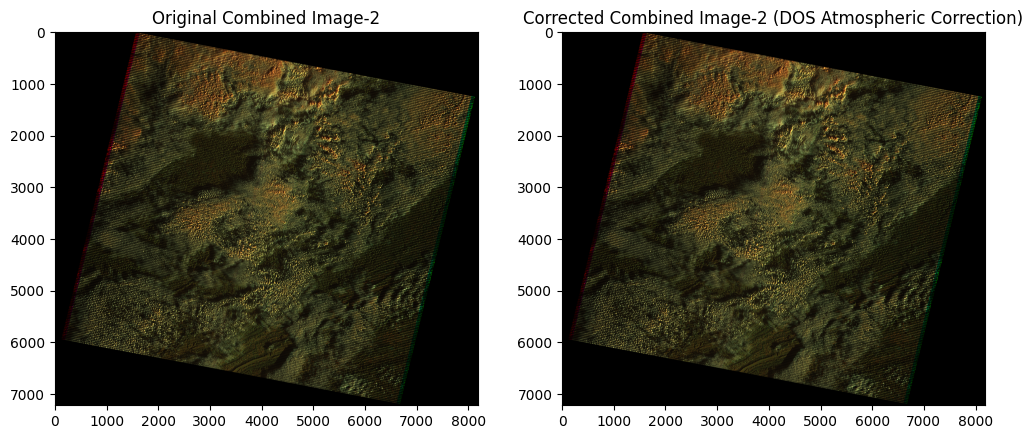

In [38]:
# Apply DOS atmospheric correction to all bands
corrected_bands2 = dark_object_subtraction(band_paths2, qa_band_path2)

# Combine the corrected bands into a single RGB image
rgb_image2 = np.stack(corrected_bands2[-3:], axis=-1)  # Assuming bands 4, 3, 2 for RGB

# Plot the original and corrected combined images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.set_title('Original Combined Image-2')
ax1.imshow(np.stack([rasterio.open(band_path).read(1) for band_path in band_paths2[-3:]], axis=-1))

ax2.set_title('Corrected Combined Image-2 (DOS Atmospheric Correction)')
ax2.imshow(rgb_image2)

plt.show()


In [47]:
# Read each band separately
bands = []
for band_path in band_paths2:
    with rasterio.open(band_path) as src:
        bands.append(src.read(1))

# Stack the bands to create an RGB-like image
original_image = np.stack([bands[3], bands[2], bands[1]], axis=-1)  # Assuming bands 4, 3, and 2 for RGB

# Get metadata from one of the bands
with rasterio.open(band_paths2[0]) as src:
    metadata = src.meta.copy()

# Update metadata for the RGB image
metadata.update({
    'count': 3,  # Number of bands in the RGB image
    'dtype': rgb_image.dtype
})

# Save the RGB image as a TIFF file
output_path = '/content/drive/MyDrive/major_Project/Datasets/Lansat7_2/DOS_output_rgb_image.jpg'
with rasterio.open(output_path, 'w', **metadata) as dst:
    dst.write(original_image.transpose(2, 0, 1))


In [46]:

# Save the RGB image as a TIFF file
corrected_path = '/content/drive/MyDrive/major_Project/Datasets/Lansat7_2/DOS_corrected_image.jpg'
with rasterio.open(corrected_path, 'w', **metadata) as dst:
    dst.write(rgb_image2.transpose(2, 0, 1))

Print the Histograms for pixel values Vs Frequency

In [50]:
def plot_pixel_value_vs_frequency(image):
    # Convert the image to grayscale if it's a color image
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calculate the histogram
    histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

    # Create an array of pixel values
    pixel_values = np.arange(256)

    # Plot pixel value vs. frequency using bars
    plt.bar(pixel_values, histogram.flatten(), color='red', alpha=0.7, width=1.5)
    plt.title('Pixel Value vs. Frequency')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.show()

Before Correction


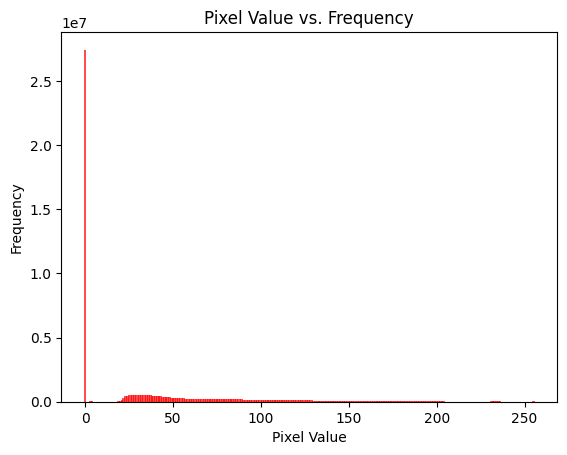

After Correction


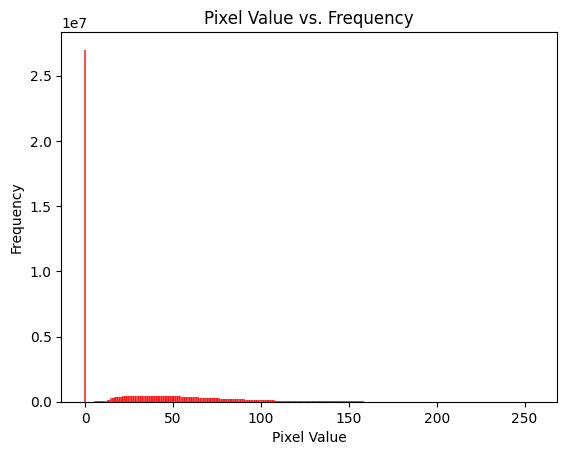

In [51]:
import cv2
#histogram before correction
print("Before Correction")
image = cv2.imread(output_path)
# Plot pixel value vs. frequency
plot_pixel_value_vs_frequency(image)

#histogram after correction
 # Replace with your image path
image = cv2.imread(corrected_path)
print("After Correction")
# Plot pixel value vs. frequency
plot_pixel_value_vs_frequency(image)